In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Lectura y Carga

In [2]:
df = pd.read_csv(r"../Mortalidad Infantil/Mortalidad Infantil - Final.csv",sep=";",index_col=0)
df

Tasa global de fecundidad  Tasa Mortalidad < 5  \
0                         1.50                 14.3   
11                        1.40                 10.1   
22                        1.70                 13.6   
33                        1.50                 10.6   
44                        2.00                 15.4   
..                         ...                  ...   
175                       0.87                 43.5   
186                       0.58                  9.4   
197                       1.05                 12.1   
208                       0.84                 11.7   
219                       1.02                 15.5   

     Porcentaje Bajo Peso al Nacer  Muertes Maternas  \
0                             12.3               0.0   
11                            13.0               0.0   
22                            12.7               6.0   
33                            14.3               0.0   
44                            12.9               5.0   
..                             ...               ...   
175                            8.7               0.0   
186                           14.2               1.0   
197                           15.1               0.0   
208                           14.6               2.0   
219                           16.6               1.0   

     Tasa Mortalidad Perinatal  Madres R. No Asegurado  \
0                         15.9                   108.0   
11                        15.9                   120.0   
22                        14.0                   964.0   
33                        13.3                   106.0   
44                        16.3                  1225.0   
..                         ...                     ...   
175                        0.0                     0.0   
186                       10.4                    36.0   
197                       13.2                   170.0   
208                        9.2                   190.0   
219                       14.2                   266.0   

     Razón de Prevalencia - Sífilis  Madres R. Subsidiado  \
0                            10.582                 191.0   
11                            4.700                 195.0   
22                            5.148                2635.0   
33                            1.427                 180.0   
44                            6.893                4435.0   
..                              ...                   ...   
175                           0.000                  12.0   
186                           9.404                  80.0   
197                          11.927                 380.0   
208                           4.027                 443.0   
219                          12.700                1078.0   

     Tasa crecimiento poblacional  Tasa de Pobreza  Partos Cesarea   Año  \
0                          -2.285            14.90           411.0  2012   
11                         -3.499            14.72           728.0  2012   
22                          2.540            30.52          3745.0  2012   
33                          0.861            15.52          1126.0  2012   
44                          0.873            37.00          3615.0  2012   
..                            ...              ...             ...   ...   
175                         2.091              NaN             7.0  2022   
186                         0.848            10.20           504.0  2022   
197                        -1.453            45.34           694.0  2022   
208                         0.264            20.22          2395.0  2022   
219                         0.352            65.80          1456.0  2022   

               Área  
0    Antonio Nariño  
11   Barrios Unidos  
22             Bosa  
33        Chapinero  
44   Ciudad Bolívar  
..              ...  
175         Sumapaz  
186     Teusaquillo  
197      Tunjuelito  
208         Usaquén  
219            Usme  

[220 rows x 13 columns]

In [3]:
df.describe()

Tasa global de fecundidad  Tasa Mortalidad < 5  \
count                 220.000000           220.000000   
mean                    1.393273            11.064091   
std                     0.363401             4.329893   
min                     0.500000             0.000000   
25%                     1.100000             9.175000   
50%                     1.400000            11.000000   
75%                     1.700000            12.725000   
max                     2.800000            43.500000   

       Porcentaje Bajo Peso al Nacer  Muertes Maternas  \
count                     220.000000        220.000000   
mean                       13.376364          1.431818   
std                         1.770325          1.764668   
min                         4.500000          0.000000   
25%                        12.400000          0.000000   
50%                        13.200000          1.000000   
75%                        14.225000          2.000000   
max                        20.000000          8.000000   

       Tasa Mortalidad Perinatal  Madres R. No Asegurado  \
count                 220.000000              220.000000   
mean                   13.957727              335.404545   
std                     6.569848              351.096358   
min                     0.000000                0.000000   
25%                    11.475000               78.000000   
50%                    13.400000              202.500000   
75%                    15.800000              477.000000   
max                    59.200000             1595.000000   

       Razón de Prevalencia - Sífilis  Madres R. Subsidiado  \
count                      220.000000            220.000000   
mean                         7.963995            880.904545   
std                          7.633017            933.543632   
min                          0.000000              6.000000   
25%                          3.662750            174.750000   
50%                          6.346000            463.500000   
75%                          9.656750           1450.000000   
max                         58.182000           4435.000000   

       Tasa crecimiento poblacional  Tasa de Pobreza  Partos Cesarea  \
count                    220.000000       210.000000      220.000000   
mean                       0.470395        20.889667     1918.650000   
std                        2.485168        14.035395     1702.852796   
min                       -9.789000         3.000000        1.000000   
25%                       -0.462000        10.047500      600.500000   
50%                        0.234500        17.865000     1398.500000   
75%                        1.223250        26.750000     3048.500000   
max                       22.774000        70.820000     6707.000000   

               Año  
count   220.000000  
mean   2017.000000  
std       3.169489  
min    2012.000000  
25%    2014.000000  
50%    2017.000000  
75%    2020.000000  
max    2022.000000

# Imputación

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tasa global de fecundidad       220 non-null    float64
 1   Tasa Mortalidad < 5             220 non-null    float64
 2   Porcentaje Bajo Peso al Nacer   220 non-null    float64
 3   Muertes Maternas                220 non-null    float64
 4   Tasa Mortalidad Perinatal       220 non-null    float64
 5   Madres R. No Asegurado          220 non-null    float64
 6   Razón de Prevalencia - Sífilis  220 non-null    float64
 7   Madres R. Subsidiado            220 non-null    float64
 8   Tasa crecimiento poblacional    220 non-null    float64
 9   Tasa de Pobreza                 210 non-null    float64
 10  Partos Cesarea                  220 non-null    float64
 11  Año                             220 non-null    int64  
 12  Área                            220 non-n

Los únicos nulos que existen son los que corresponden a Sumapaz dado que no se encontró datos sobre su tasa de pobreza, por ahora se dejan y en caso de que sea necesario, se excluirá del análisis provisionalmente

In [5]:
df.drop(df[df["Área"]=="Sumapaz"].index,axis=0,inplace=True)
df.shape

(209, 13)

# Modelo sin Regresores

In [51]:
observados = df["Tasa Mortalidad < 5"].values
coords = {"Locs":['Antonio Nariño', 'Barrios Unidos', 'Bosa', 'Chapinero',
       'Ciudad Bolívar', 'Engativá', 'Fontibón', 'Kennedy',
       'La Candelaria', 'Los Mártires', 'Puente Aranda',
       'Rafael Uribe Uribe', 'San Cristóbal', 'Santa Fe', 'Suba',
       'Teusaquillo', 'Tunjuelito', 'Usaquén', 'Usme']}

In [53]:
with pm.Model(coords=coords) as mortalidad_j:
    # Priors globales para la media y la desviación estándar
    mu_global = pm.Normal('Bogotá', mu=0, sigma=20)  
    sigma_global = pm.Exponential('sigma_global', 1)   
    
    # Crear un diccionario con nombres dinámicos para los priors
    prior_mortalidad = pm.Normal('media_loc', mu=mu_global, sigma=sigma_global,dims="Locs")

    # Error o sigma para las observaciones
    sigma = pm.Exponential('sigma', 1,dims="Locs")  # Error global

    idx = np.tile(np.arange(0, 19), 11) 
    # Observaciones (alturas de los estudiantes)
    obs = pm.Normal('obs', mu=prior_mortalidad[idx], sigma=sigma[idx], observed=observados)
    
    # Muestreo
    trace = pm.sample(4000, return_inferencedata=True, cores=1, chains=4,step=pm.NUTS(target_accept=0.95))


Sequential sampling (4 chains in 1 job)
NUTS: [Bogotá, sigma_global, media_loc, sigma]


Output()

Output()

Output()

Output()

Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 128 seconds.


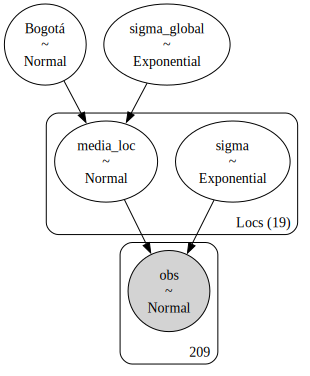

In [54]:
pm.model_to_graphviz(mortalidad_j)

In [55]:
az.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
Bogotá                         11.107  0.291  10.574   11.681      0.002   
media_loc[Antonio Nariño]      11.205  0.650   9.944   12.407      0.004   
media_loc[Barrios Unidos]      10.999  0.604   9.881   12.150      0.004   
media_loc[Bosa]                11.014  0.547   9.959   12.028      0.003   
media_loc[Chapinero]           10.399  0.723   9.051   11.775      0.005   
media_loc[Ciudad Bolívar]      12.250  0.470  11.336   13.115      0.003   
media_loc[Engativá]            10.902  0.276  10.365   11.413      0.002   
media_loc[Fontibón]            10.310  0.525   9.301   11.294      0.003   
media_loc[Kennedy]             10.763  0.397   9.987   11.480      0.003   
media_loc[La Candelaria]       10.541  0.911   8.850   12.294      0.006   
media_loc[Los Mártires]        12.124  0.719  10.791   13.478      0.005   
media_loc[Puente Aranda]       10.618  0.503   9.673   11.561      0.003   
media_loc[Rafael Uribe Uribe]  10.482  0.383   9.772   11.225      0.003   
media_loc[San Cristóbal]       12.409  0.501  11.470   13.341      0.004   
media_loc[Santa Fe]            12.204  0.687  10.917   13.508      0.005   
media_loc[Suba]                10.451  0.375   9.755   11.172      0.003   
media_loc[Teusaquillo]         11.150  0.712   9.802   12.494      0.004   
media_loc[Tunjuelito]          11.201  0.702   9.803   12.439      0.004   
media_loc[Usaquén]              9.572  0.575   8.525   10.709      0.004   
media_loc[Usme]                12.457  0.501  11.486   13.368      0.004   
sigma[Antonio Nariño]           2.795  0.565   1.833    3.826      0.004   
sigma[Barrios Unidos]           2.497  0.509   1.645    3.456      0.003   
sigma[Bosa]                     2.151  0.461   1.395    3.016      0.003   
sigma[Chapinero]                3.188  0.628   2.127    4.367      0.004   
sigma[Ciudad Bolívar]           1.621  0.380   1.014    2.325      0.003   
sigma[Engativá]                 0.934  0.224   0.579    1.353      0.002   
sigma[Fontibón]                 1.954  0.427   1.264    2.753      0.003   
sigma[Kennedy]                  1.454  0.332   0.930    2.094      0.002   
sigma[La Candelaria]            5.204  0.928   3.624    6.955      0.006   
sigma[Los Mártires]             2.968  0.615   1.952    4.100      0.004   
sigma[Puente Aranda]            1.878  0.414   1.196    2.633      0.003   
sigma[Rafael Uribe Uribe]       1.335  0.311   0.844    1.933      0.002   
sigma[San Cristóbal]            1.694  0.398   1.044    2.438      0.003   
sigma[Santa Fe]                 2.699  0.577   1.741    3.758      0.004   
sigma[Suba]                     1.289  0.301   0.791    1.856      0.002   
sigma[Teusaquillo]              3.286  0.647   2.225    4.502      0.004   
sigma[Tunjuelito]               3.090  0.618   2.063    4.258      0.004   
sigma[Usaquén]                  1.967  0.460   1.233    2.837      0.003   
sigma[Usme]                     1.732  0.405   1.055    2.469      0.003   
sigma_global                    1.031  0.249   0.592    1.502      0.002   

                               mcse_sd  ess_bulk  ess_tail  r_hat  
Bogotá                           0.002   16272.0   10911.0    1.0  
media_loc[Antonio Nariño]        0.003   27741.0   11818.0    1.0  
media_loc[Barrios Unidos]        0.003   25427.0   11287.0    1.0  
media_loc[Bosa]                  0.002   25526.0   11535.0    1.0  
media_loc[Chapinero]             0.004   21184.0   12136.0    1.0  
media_loc[Ciudad Bolívar]        0.002   20036.0   11770.0    1.0  
media_loc[Engativá]              0.001   23380.0   10148.0    1.0  
media_loc[Fontibón]              0.002   23181.0   12075.0    1.0  
media_loc[Kennedy]               0.002   21739.0   11001.0    1.0  
media_loc[La Candelaria]         0.004   23657.0   11350.0    1.0  
media_loc[Los Mártires]          0.004   20945.0   12956.0    1.0  
media_loc[Puente Aranda]         0.002   25207.0   11487.0    1.0  
media_loc[Rafael Uribe Uribe]   

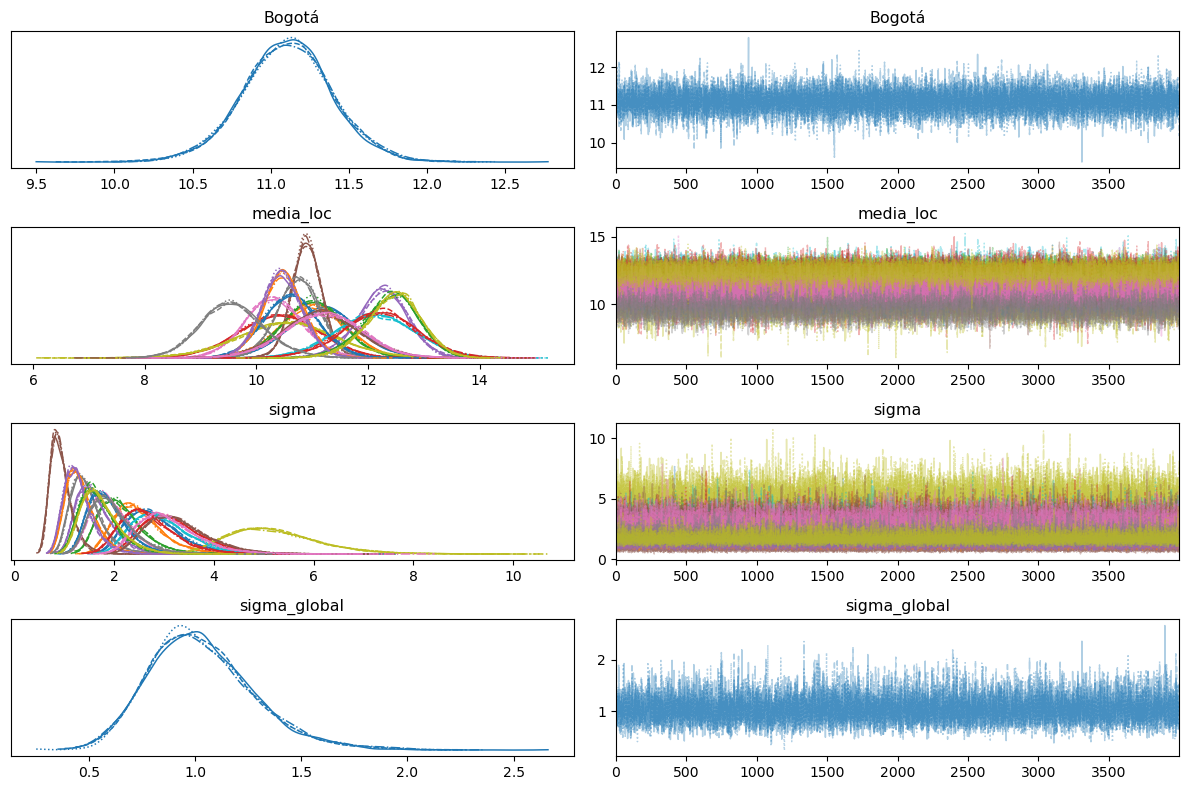

In [56]:
# Visualizar las trazas para cada parámetro
az.plot_trace(trace)
plt.tight_layout()
plt.show()

# Modelo con Regresores I


In [ ]:
observados = df["Tasa Mortalidad < 5"].values

In [10]:
datos = df.copy()
datos.drop(columns=['Tasa Mortalidad < 5',"Tasa Mortalidad Perinatal",'Año', 'Área'],axis=1,inplace=True)
datos = datos[['Tasa global de fecundidad', 'Porcentaje Bajo Peso al Nacer',
       'Muertes Maternas', 'Madres R. No Asegurado', 'Razón de Prevalencia - Sífilis',
       'Madres R. Subsidiado', 'Tasa crecimiento poblacional', 'Tasa de Pobreza', 'Partos Cesarea']]
datos.insert(0,"Intercepto",np.ones(209))
datos = datos.values

In [30]:
variables = ['fecundidad', 'bajo peso', 'muerte materna', 'no aseg', 
             'sifilis', 'subs', 'crec', 'pobreza', 'partos']

coords = {"Locs":['Antonio Nariño', 'Barrios Unidos', 'Bosa', 'Chapinero',
       'Ciudad Bolívar', 'Engativá', 'Fontibón', 'Kennedy',
       'La Candelaria', 'Los Mártires', 'Puente Aranda',
       'Rafael Uribe Uribe', 'San Cristóbal', 'Santa Fe', 'Suba',
       'Teusaquillo', 'Tunjuelito', 'Usaquén', 'Usme'],"Observacion":observados}

with pm.Model(coords=coords) as mortalidad_j_r:
    # Priors globales para los parámetros y sigmas
    priors_glob = {}
    sigma_glob = {}
    priors_glob["intercept_global"] = pm.Normal('Bogotá_global', mu=5, sigma=30)
    sigma_glob["intercept_sigma"] = pm.Exponential('Bogotá_sigma',1)
    for i in variables:
        priors_glob[f"{i}_glob"] = pm.Normal(f"{i}_glob",mu=5,sigma=30)
        sigma_glob[f"{i}_sigma_glob"] = pm.Exponential(f"{i}_sigma_glob",1)
    
    # Priors a nivel de grupo
    priors_group = {}
    priors_group["intercept_group"] = pm.Normal('intercepto_grupo', mu=priors_glob["intercept_global"], sigma=sigma_glob["intercept_sigma"])
    for i in variables:
        priors_group[f"{i}_group"] = pm.Normal(f'{i}_group', mu =priors_glob[f"{i}_glob"],sigma=sigma_glob[f"{i}_sigma_glob"])
        
    # Regresión para la variable dependiente
    # Definir mu
    betas = pm.math.stack([priors_group[i] for i in priors_group.keys()])
    mu = pm.math.dot(datos, betas)
    
    # Likelihood
    sigma = pm.Exponential('sigma', 1)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=observados)
    
    # MCMC
    trace = pm.sample(2000, return_inferencedata=True,cores=1,step=pm.NUTS(target_accept=0.99))

Sequential sampling (2 chains in 1 job)
NUTS: [Bogotá_global, Bogotá_sigma, fecundidad_glob, fecundidad_sigma_glob, bajo peso_glob, bajo peso_sigma_glob, muerte materna_glob, muerte materna_sigma_glob, no aseg_glob, no aseg_sigma_glob, sifilis_glob, sifilis_sigma_glob, subs_glob, subs_sigma_glob, crec_glob, crec_sigma_glob, pobreza_glob, pobreza_sigma_glob, partos_glob, partos_sigma_glob, intercepto_grupo, fecundidad_group, bajo peso_group, muerte materna_group, no aseg_group, sifilis_group, subs_group, crec_group, pobreza_group, partos_group, sigma]


Output()

Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1764 seconds.
There were 263 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


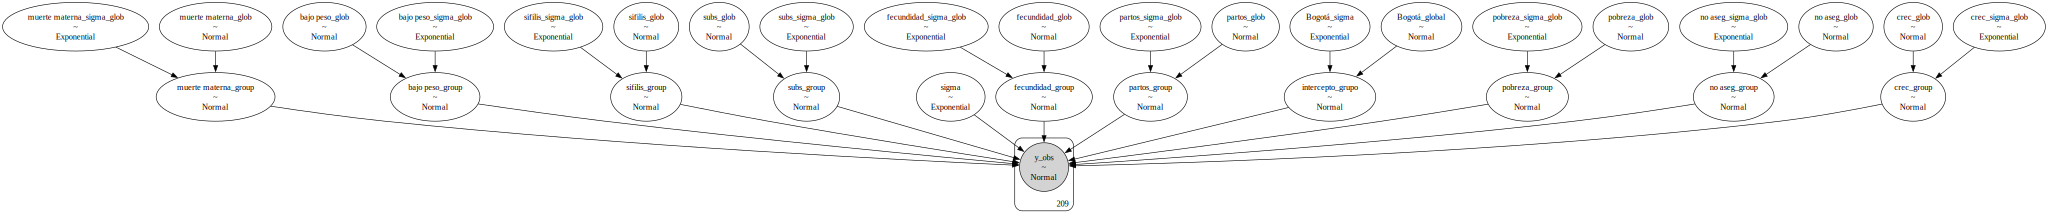

In [32]:
pm.model_to_graphviz(mortalidad_j_r)

In [33]:
az.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Bogotá_global              5.133  3.071  -0.418   10.845      0.084    0.061   
Bogotá_sigma               1.044  1.038   0.022    2.868      0.029    0.020   
bajo peso_glob             0.453  1.449  -2.174    3.377      0.065    0.053   
bajo peso_group            0.398  0.188   0.035    0.736      0.005    0.004   
bajo peso_sigma_glob       1.004  0.961   0.009    2.757      0.035    0.026   
crec_glob                 -0.023  1.512  -2.884    3.409      0.047    0.039   
crec_group                -0.023  0.078  -0.176    0.119      0.002    0.001   
crec_sigma_glob            1.053  1.060   0.010    3.018      0.031    0.022   
fecundidad_glob            0.800  1.419  -1.730    3.581      0.036    0.029   
fecundidad_group           0.788  0.698  -0.629    1.972      0.017    0.012   
fecundidad_sigma_glob      0.966  0.932   0.012    2.667      0.024    0.017   
intercepto_grupo           5.095  2.699  -0.157   10.113      0.075    0.055   
muerte materna_glob        0.126  1.575  -3.067    2.750      0.060    0.048   
muerte materna_group       0.091  0.156  -0.192    0.384      0.003    0.003   
muerte materna_sigma_glob  1.037  1.042   0.008    2.922      0.037    0.026   
no aseg_glob               0.032  1.259  -2.334    2.621      0.036    0.028   
no aseg_group              0.000  0.001  -0.001    0.002      0.000    0.000   
no aseg_sigma_glob         0.968  0.966   0.007    2.770      0.029    0.020   
partos_glob                0.098  1.421  -2.457    2.869      0.042    0.030   
partos_group              -0.001  0.000  -0.001   -0.000      0.000    0.000   
partos_sigma_glob          1.014  1.010   0.006    2.815      0.029    0.021   
pobreza_glob               0.036  1.419  -2.524    3.254      0.049    0.037   
pobreza_group             -0.007  0.022  -0.050    0.032      0.001    0.000   
pobreza_sigma_glob         1.008  0.996   0.006    2.848      0.033    0.023   
sifilis_glob              -0.066  1.279  -2.407    2.557      0.049    0.039   
sifilis_group             -0.033  0.031  -0.092    0.024      0.001    0.000   
sifilis_sigma_glob         0.969  0.962   0.004    2.721      0.032    0.022   
sigma                      2.665  0.135   2.408    2.911      0.002    0.002   
subs_glob                 -0.010  1.336  -2.520    2.471      0.061    0.043   
subs_group                 0.001  0.000   0.000    0.002      0.000    0.000   
subs_sigma_glob            0.972  0.972   0.006    2.690      0.032    0.023   

                           ess_bulk  ess_tail  r_hat  
Bogotá_global                1361.0    1929.0   1.00  
Bogotá_sigma                 1156.0    1476.0   1.00  
bajo peso_glob                932.0     393.0   1.00  
bajo peso_group              1357.0    2075.0   1.00  
bajo peso_sigma_glob          855.0    1344.0   1.01  
crec_glob                    1540.0    1162.0   1.00  
crec_group                   2258.0    1888.0   1.00  
crec_sigma_glob               792.0     598.0   1.00  
fecundidad_glob              1855.0    1674.0   1.00  
fecundidad_group             1713.0    2442.0   1.00  
fecundidad_sigma_glob        1316.0    1791.0   1.00  
intercepto_grupo             1293.0     671.0   1.00  
muerte materna_glob          1275.0     777.0   1.00  
muerte materna_group         2533.0     779.0   1.00  
muerte materna_sigma_glob     761.0    1107.0   1.00  
no aseg_glob                 1573.0    1345.0   1.00  
no aseg_group                2564.0    2565.0   1.00  
no aseg_sigma_glob            934.0    1095.0   1.00  
partos_glob                  1587.0     630.0   1.00  
partos_group                 1755.0     762.0   1.00  
partos_sigma_glob            1023.0    1532.0   1.00  
pobreza_glob                 1170.0     907.0   1.00  
pobreza_group                1556.0    1718.0   1.00  
pobreza_sigma_glob            752.0    1452.0   1.00  
sifilis_glob                  993.0     767.0   1.01  
sifilis_group                3023.0  

c:\Users\samue\miniconda3\envs\Bayesiana_Disc1\Lib\site-packages\arviz\plots\traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (31), generating only 20 plots
  warnings.warn(


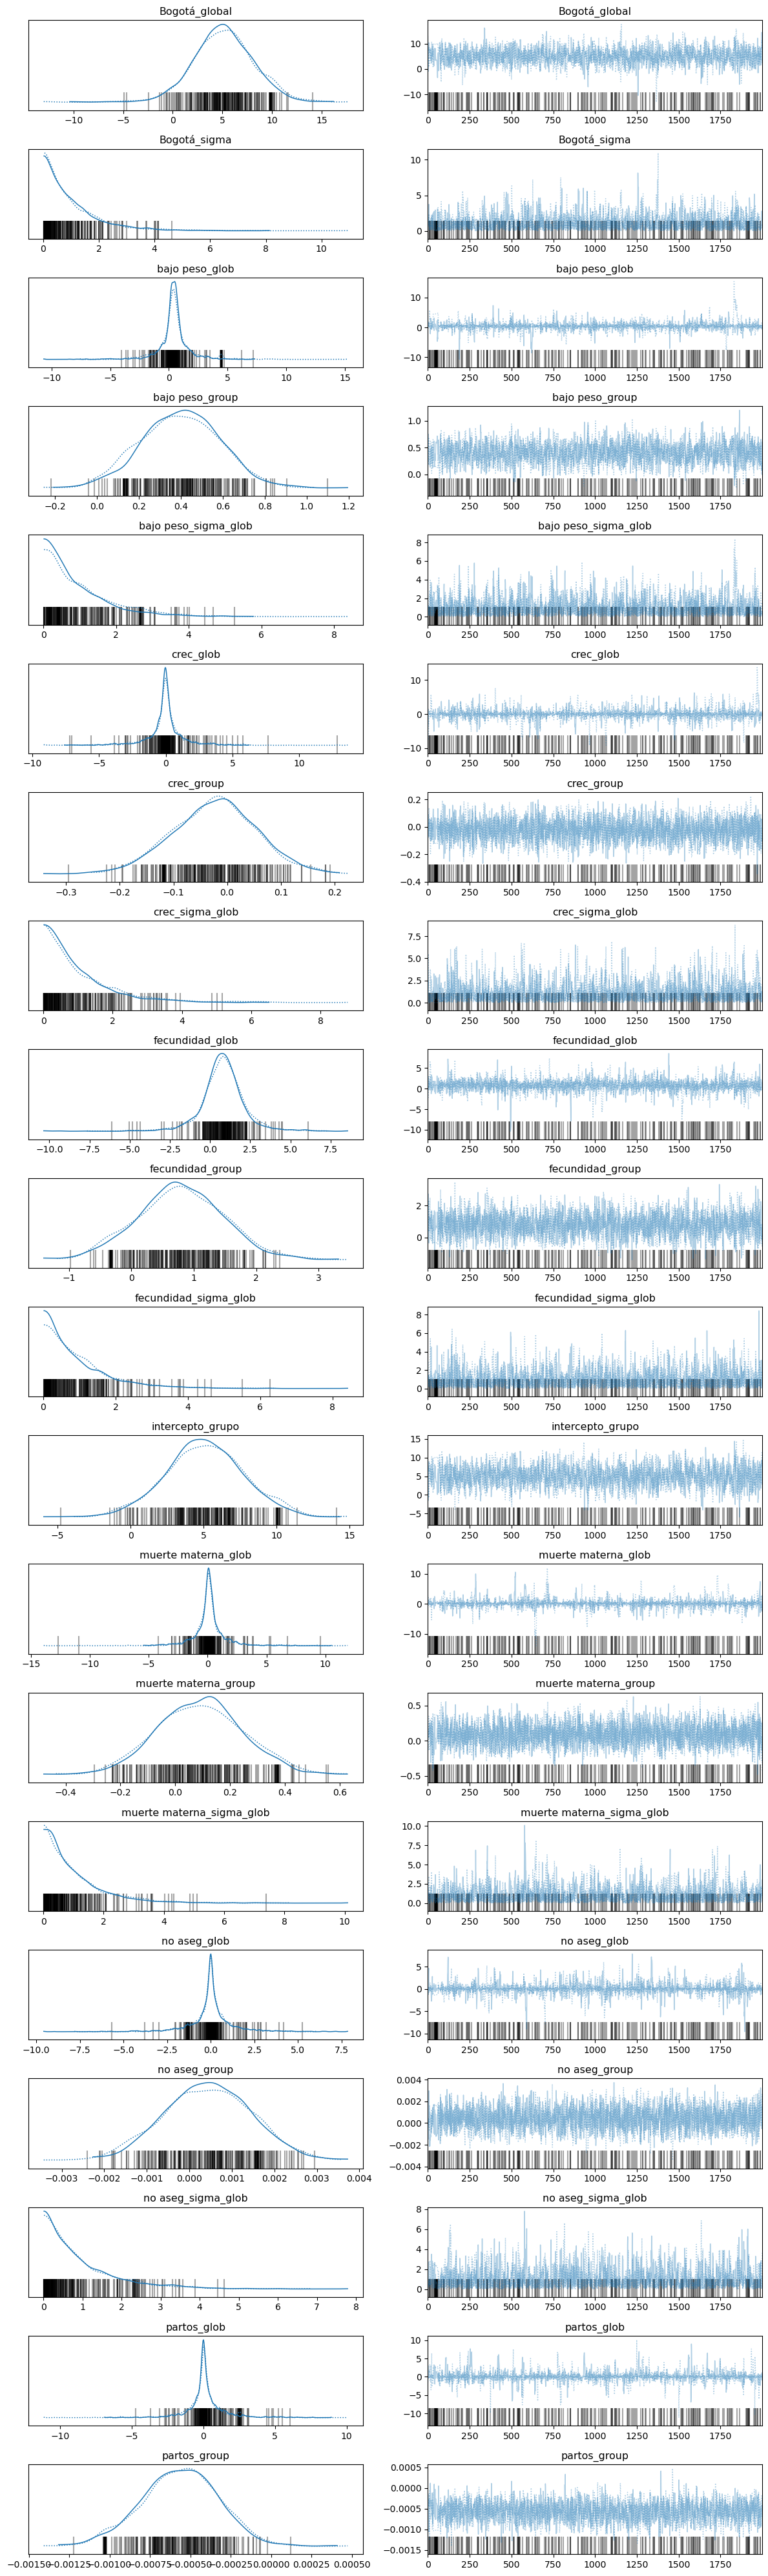

In [34]:
# Visualizar las trazas para cada parámetro
az.plot_trace(trace)
plt.tight_layout()
plt.show()

# Modelo con Regresores II

In [6]:
observados = df["Tasa Mortalidad < 5"].values

In [7]:
observados = np.log(observados + 1e-3)

In [8]:
datos = df.copy()
datos.drop(columns=['Tasa Mortalidad < 5',"Tasa Mortalidad Perinatal",'Año', 'Área'],axis=1,inplace=True)
datos = datos[['Tasa global de fecundidad', 'Porcentaje Bajo Peso al Nacer',
       'Muertes Maternas', 'Madres R. No Asegurado', 'Razón de Prevalencia - Sífilis',
       'Madres R. Subsidiado', 'Tasa crecimiento poblacional','Tasa de Pobreza', 'Partos Cesarea']]

## Transformaciones

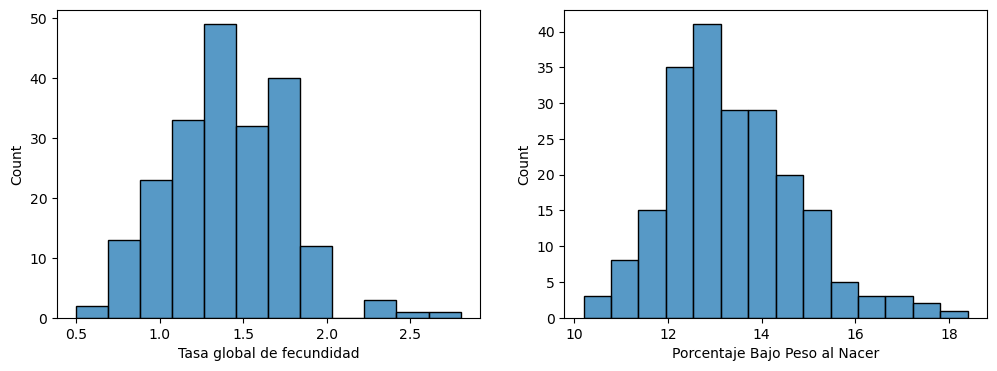

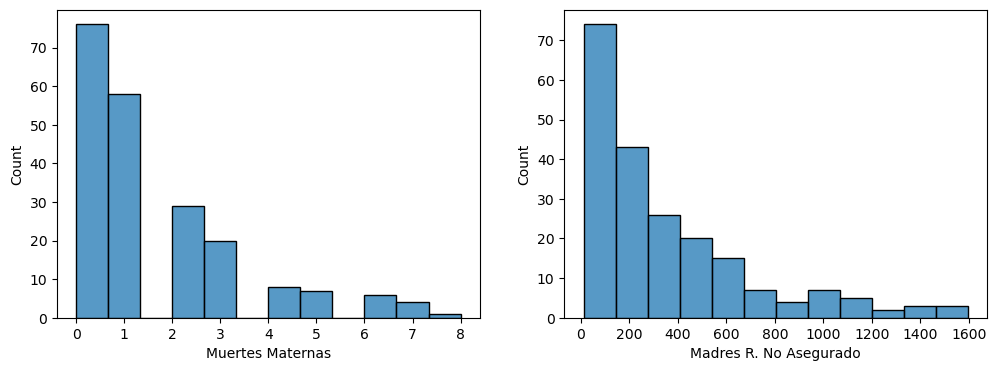

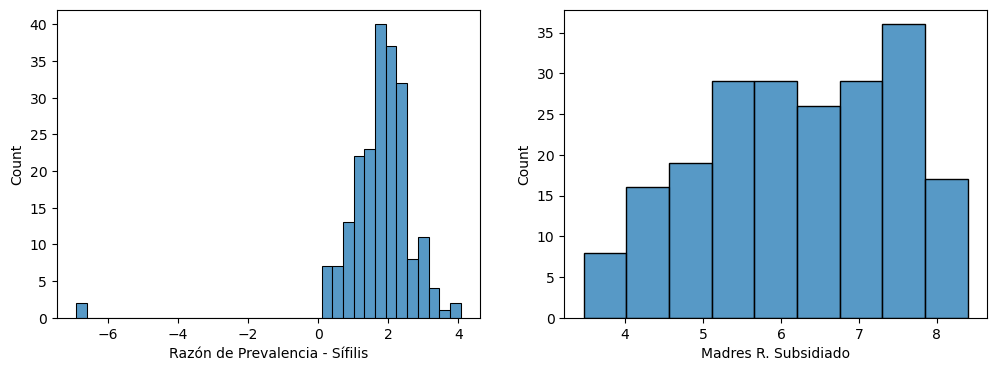

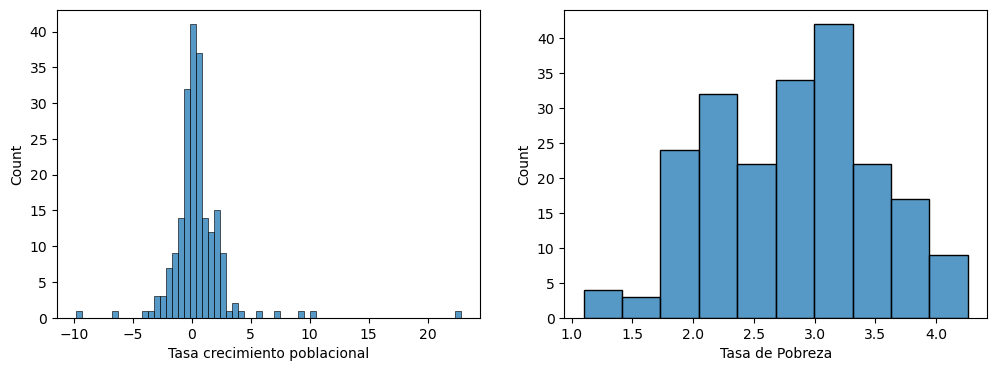

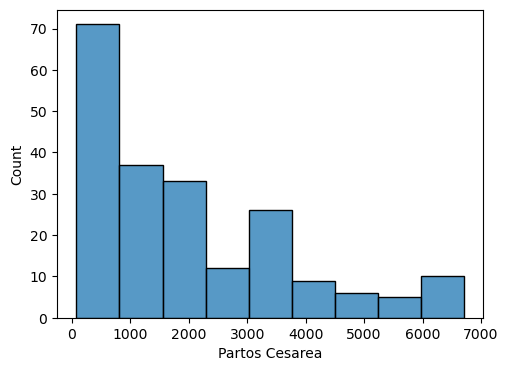

In [37]:
for i in range(1,len(datos.columns),2):
    fig,ax = plt.subplots(1,2,figsize=(12,4))
    sns.histplot(data=datos,x=datos.columns[i-1],ax=ax[0])
    sns.histplot(data=datos,x=datos.columns[i],ax=ax[1])
    plt.show()
plt.figure(figsize=(5.5,4))
sns.histplot(data=datos,x=datos.columns[-1])
plt.show()

In [9]:
datos["Tasa de Pobreza"] = np.log(datos["Tasa de Pobreza"]) 
datos["Madres R. Subsidiado"] = np.log(datos["Madres R. Subsidiado"] + 0.001)
datos["Razón de Prevalencia - Sífilis"] = np.log(datos["Razón de Prevalencia - Sífilis"] + 0.001)

In [125]:
sp.stats.anderson(observados, dist="norm")

AndersonResult(statistic=30.74219550190236, critical_values=array([0.566, 0.644, 0.773, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.3366179863805088, scale=0.6871182616958572)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

## Estandarización

In [10]:
scaler = StandardScaler()
datos_est = scaler.fit_transform(datos)

## Modelo

In [11]:
variables = ['fecundidad', 'bajo peso', 'muerte materna', 'no aseg', 
             'sifilis', 'subs', 'crec','pobreza', 'partos']

coords = {"Locs":['Antonio Nariño', 'Barrios Unidos', 'Bosa', 'Chapinero',
       'Ciudad Bolívar', 'Engativá', 'Fontibón', 'Kennedy',
       'La Candelaria', 'Los Mártires', 'Puente Aranda',
       'Rafael Uribe Uribe', 'San Cristóbal', 'Santa Fe', 'Suba',
       'Teusaquillo', 'Tunjuelito', 'Usaquén', 'Usme'],"Observacion":observados}

with pm.Model(coords=coords) as mortalidad_j_r:
    # Priors globales para los parámetros y sigmas
    priors_glob = {}
    priors_glob["intercept_global"] = pm.Normal('Bogotá_global', mu=2, sigma=20)
    sigma_glob = pm.HalfNormal('Bogotá_sigma',50)
    for i in variables:
        priors_glob[f"{i}_glob"] = pm.Normal(f"{i}_glob",mu=0,sigma=20)
    
    # Priors a nivel de grupo
    z_intercept_group = pm.Normal('z_intercept_group', mu=0, sigma=1, dims="Locs")
    intercept_group = pm.Deterministic("intercept_group",
        priors_glob["intercept_global"] + sigma_glob * z_intercept_group
    )

    # Definir mu
    betas = pm.math.stack([priors_glob[f"{i}_glob"] for i in variables])
    idx = np.tile(np.arange(0, 19), 11)   

    # Ahora, el intercepto se ajusta por grupo usando el índice de localización
    mu = intercept_group[idx] + pm.math.dot(datos_est, betas)
    
    # Likelihood
    sigma = pm.HalfCauchy("sigma",beta=1)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=observados)
    
    # MCMC
    trace = pm.sample(1000, return_inferencedata=True,cores=1,chains=4,step=pm.HamiltonianMC(target_accept=0.95),init="jitter+adapt_diag")

ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\samue\miniconda3\envs\Bayesiana_Disc1\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1909, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\samue\miniconda3\envs\Bayesiana_Disc1\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1081, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\samue\miniconda3\envs\Bayesiana_Disc1\Lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1122, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Output()

Output()

Output()

Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 101 seconds.


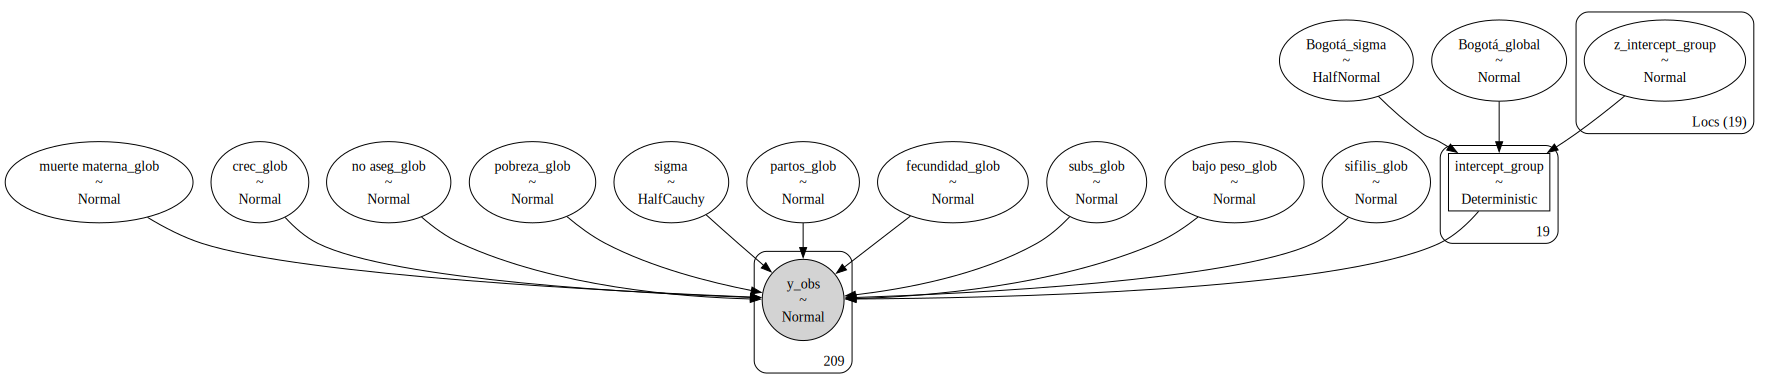

In [13]:
pm.model_to_graphviz(mortalidad_j_r)

In [12]:
desviaciones = [1,1,datos.std(axis=0)["Porcentaje Bajo Peso al Nacer"], datos.std(axis=0)["Tasa crecimiento poblacional"],
                datos.std(axis=0)["Tasa global de fecundidad"]]
desviaciones.extend(list(np.ones(19)))
desviaciones.extend([datos.std(axis=0)["Muertes Maternas"],
                datos.std(axis=0)["Madres R. No Asegurado"],datos.std(axis=0)["Partos Cesarea"],
                datos.std(axis=0)["Tasa de Pobreza"],datos.std(axis=0)["Razón de Prevalencia - Sífilis"],1,
                datos.std(axis=0)["Madres R. Subsidiado"]])

In [13]:
variables_post = [var for var in trace.posterior.data_vars if var != 'z_intercept_group']
sum = az.summary(trace,variables_post)
sum["mean"] = sum["mean"].values * np.array(desviaciones) 
sum["sd"] = sum["sd"].values * np.array(desviaciones)
sum["hdi_3%"] = sum["hdi_3%"].values * np.array(desviaciones)
sum["hdi_97%"] = sum["hdi_97%"].values * np.array(desviaciones)
sum.iloc[[0]+list(range(5,24)),0] = np.exp(sum.iloc[[0]+list(range(5,24)),0]) 
sum

mean          sd      hdi_3%     hdi_97%  \
Bogotá_global         10.360495    0.051000    2.238000    2.429000   
Bogotá_sigma           0.087000    0.064000    0.000000    0.198000   
bajo peso_glob         0.304192    0.090700    0.133956    0.473033   
crec_glob             -0.071411    0.120660   -0.283181    0.164984   
fecundidad_glob       -0.027394    0.021550   -0.067207    0.012784   
intercept_group[0]    10.601548    0.098000    2.183000    2.562000   
intercept_group[1]    10.559226    0.097000    2.179000    2.559000   
intercept_group[2]    10.433273    0.097000    2.164000    2.543000   
intercept_group[3]    10.155343    0.095000    2.129000    2.489000   
intercept_group[4]    10.247154    0.099000    2.127000    2.520000   
intercept_group[5]    10.412427    0.097000    2.154000    2.528000   
intercept_group[6]    10.277942    0.093000    2.157000    2.513000   
intercept_group[7]    10.538129    0.101000    2.176000    2.568000   
intercept_group[8]     9.727919    0.129000    2.033000    2.495000   
intercept_group[9]    11.056296    0.115000    2.230000    2.656000   
intercept_group[10]   10.601548    0.098000    2.176000    2.555000   
intercept_group[11]    9.984162    0.103000    2.095000    2.485000   
intercept_group[12]    9.944305    0.105000    2.083000    2.479000   
intercept_group[13]   10.837366    0.104000    2.185000    2.583000   
intercept_group[14]   10.454160    0.103000    2.150000    2.556000   
intercept_group[15]   10.559226    0.103000    2.163000    2.549000   
intercept_group[16]   10.433273    0.095000    2.163000    2.534000   
intercept_group[17]    9.924436    0.105000    2.098000    2.496000   
intercept_group[18]   10.165504    0.096000    2.129000    2.495000   
muerte materna_glob    0.007116    0.120968   -0.229483    0.217030   
no aseg_glob          20.397244   29.540837  -34.464310   75.962152   
partos_glob         -482.839151  197.525107 -854.253883 -119.865663   
pobreza_glob          -0.169624    0.054306   -0.267509   -0.064363   
sifilis_glob          -0.049973    0.056636   -0.154361    0.058857   
sigma                  0.653000    0.033000    0.591000    0.715000   
subs_glob              0.524806    0.128474    0.287249    0.769634   

                     mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat  
Bogotá_global            0.001    0.001    4849.0    3273.0    1.0  
Bogotá_sigma             0.002    0.001    1422.0    2076.0    1.0  
bajo peso_glob           0.001    0.001    3518.0    3362.0    1.0  
crec_glob                0.001    0.001    6542.0    3720.0    1.0  
fecundidad_glob          0.001    0.001    3221.0    2755.0    1.0  
intercept_group[0]       0.001    0.001    6526.0    2965.0    1.0  
intercept_group[1]       0.001    0.001    6224.0    3397.0    1.0  
intercept_group[2]       0.001    0.001    6926.0    3081.0    1.0  
intercept_group[3]       0.001    0.001    5350.0    3112.0    1.0  
intercept_group[4]       0.001    0.001    6185.0    3140.0    1.0  
intercept_group[5]       0.001    0.001    6577.0    3294.0    1.0  
intercept_group[6]       0.001    0.001    6755.0    3060.0    1.0  
intercept_group[7]       0.001    0.001    5853.0    2855.0    1.0  
intercept_group[8]       0.003    0.002    2549.0    2344.0    1.0  
intercept_group[9]       0.002    0.001    3440.0    2538.0    1.0  
intercept_group[10]      0.001    0.001    5856.0    3095.0    1.0  
intercept_group[11]      0.002    0.001    4566.0    3457.0    1.0  
intercept_group[12]      0.002    0.001    3982.0    3073.0    1.0  
intercept_group[13]      0.002    0.001    5090.0    3091.0    1.0  
intercept_group[14]      0.001    0.001    5933.0    3207.0    1.0  
intercept_group[15]      0.002    0.001    5439.0    2861.0    1.0  
intercept_group[16]      0.001    0.001    7158.0    3389.0    1.0  
intercept_group[17]      0.001    0.001    5232.0    3357.0    1.0  
intercept_group[18]      0.001    0.001    6071.0    3151.0    1.0  
muerte materna_glob      0.00

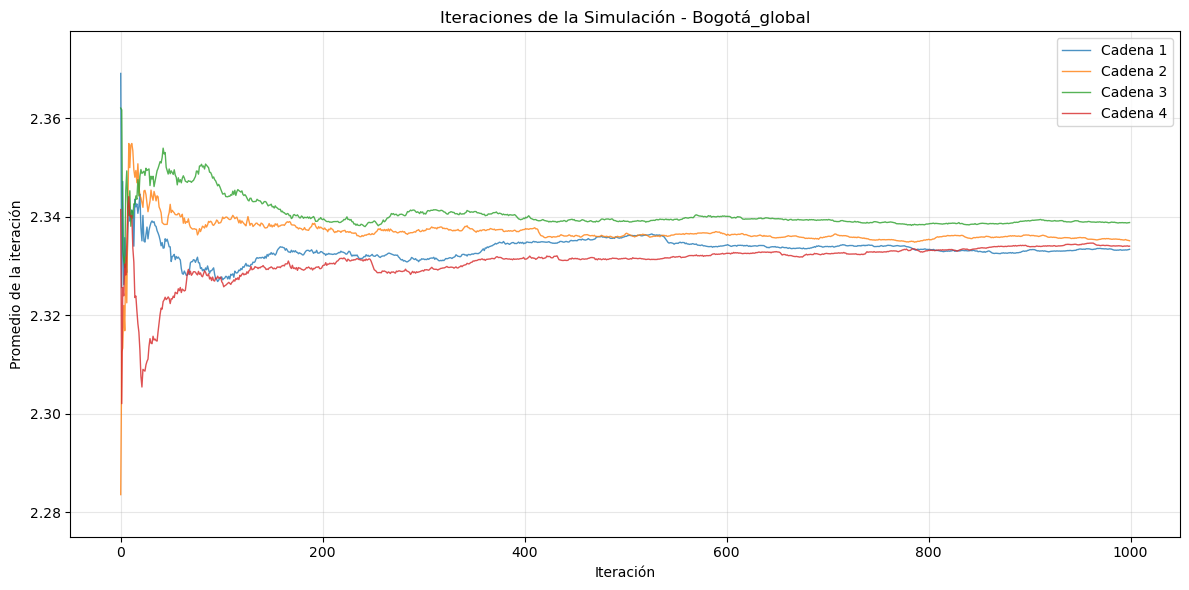

In [32]:
def plot_cumulative_means(trace, param_name, n_chains=4, figsize=(12, 6)):
    """
    Grafica la media acumulada para cada cadena de un parámetro específico del trace.
    
    Parameters:
    -----------
    trace : InferenceData o MultiTrace
        Resultado del sampling de PyMC
    param_name : str
        Nombre del parámetro a analizar
    n_chains : int
        Número de cadenas a mostrar
    figsize : tuple
        Tamaño de la figura
    
    Returns:
    --------
    fig, ax : matplotlib figure y axis
    """
    # Convertir a InferenceData si es necesario
    if not isinstance(trace, az.InferenceData):
        trace = az.convert_to_inference_data(trace)
    
    # Obtener los datos del parámetro
    param_data = trace.posterior[param_name].values
    
    # Crear la figura
    fig, ax = plt.subplots(figsize=figsize)
    
    # Colores para las diferentes cadenas
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    # Calcular y graficar la media acumulada para cada cadena
    for chain in range(n_chains):
        chain_data = param_data[chain]
        cumulative_means = np.cumsum(chain_data) / np.arange(1, len(chain_data) + 1)
        
        # Crear array de iteraciones
        iterations = np.arange(len(chain_data))
        
        # Plotear la línea
        ax.plot(iterations, cumulative_means, 
                label=f'Cadena {chain+1}',
                color=colors[chain % len(colors)],
                alpha=0.8,
                linewidth=1)
    
    # Personalizar el gráfico
    ax.set_xlabel('Iteración')
    ax.set_ylabel('Promedio de la iteración')
    ax.set_title(f'Iteraciones de la Simulación - {param_name}')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Ajustar los límites del eje y si es necesario
    y_min = np.min([np.min(np.cumsum(param_data[i]) / 
                          np.arange(1, len(param_data[i]) + 1)) 
                    for i in range(n_chains)])
    y_max = np.max([np.max(np.cumsum(param_data[i]) / 
                          np.arange(1, len(param_data[i]) + 1)) 
                    for i in range(n_chains)])
    margin = (y_max - y_min) * 0.1
    ax.set_ylim(y_min - margin, y_max + margin)
    
    # Ajustar márgenes
    plt.tight_layout()
    
    return fig, ax

# Ejemplo de uso:

fig, ax = plot_cumulative_means(
    trace=trace,
    param_name='Bogotá_global',  # o el nombre de tu parámetro
    n_chains=4
)

plt.show()

In [15]:
def create_hierarchical_forest_plot(trace_data, param_name='theta', coords=None, figsize=(12, 8)):
    """
    Crea un forest plot para visualizar resultados de un modelo jerárquico PyMC.
    
    Parameters:
    -----------
    trace_data : dict o arviz.InferenceData
        Resultados del muestreo MCMC de PyMC
    param_name : str
        Nombre del parámetro a visualizar
    coords : dict
        Diccionario con las localidades para la visualización
    figsize : tuple
        Tamaño de la figura (ancho, alto)
        
    Returns:
    --------
    fig, ax : matplotlib figure y axis
    """
    
    # Crear figura
    fig, ax = plt.subplots(figsize=figsize)
    
    # Extraer datos del trace
    if hasattr(trace_data, 'posterior'):  # Si es InferenceData
        param_samples = trace_data.posterior[param_name].values.reshape(-1, trace_data.posterior[param_name].shape[-1])
    else:  # Si es diccionario
        param_samples = trace_data[param_name]
    
    # Calcular estadísticas
    means = np.mean(np.exp(param_samples), axis=0)
    ci_lower = np.percentile(np.exp(param_samples), 2.5, axis=0)
    ci_upper = np.percentile(np.exp(param_samples), 97.5, axis=0)
    
    # Ordenar por media
    sort_idx = np.argsort(means)
    means = means[sort_idx]
    ci_lower = ci_lower[sort_idx]
    ci_upper = ci_upper[sort_idx]
    
    # Asegurarse de que las localidades están ordenadas de acuerdo con las medias
    sorted_locs = [coords["Locs"][i] for i in sort_idx]
    
    # Crear índices para el eje y
    y_pos = np.arange(len(means))
    
    # Plotear puntos y líneas de error
    ax.scatter(means, y_pos, color='black', zorder=3)
    ax.hlines(y_pos, ci_lower, ci_upper, color='black', alpha=0.5, zorder=2)
    
    # Personalizar el gráfico
    ax.grid(True, axis='x', alpha=0.3)
    ax.set_axisbelow(True)
    
    # Configurar etiquetas y títulos
    plt.yticks(y_pos, sorted_locs)  # Usar localidades ordenadas
    plt.axvline(x=np.exp(trace_data.posterior["Bogotá_global"].mean()), linestyle="--", linewidth=2,label="Bogota")
    ax.set_xlabel('Valores Estimados')
    ax.set_ylabel('Localidades')
    ax.set_title(f'Tasa de Mortalidad Infantil')
    
    # Ajustar márgenes
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return fig, ax


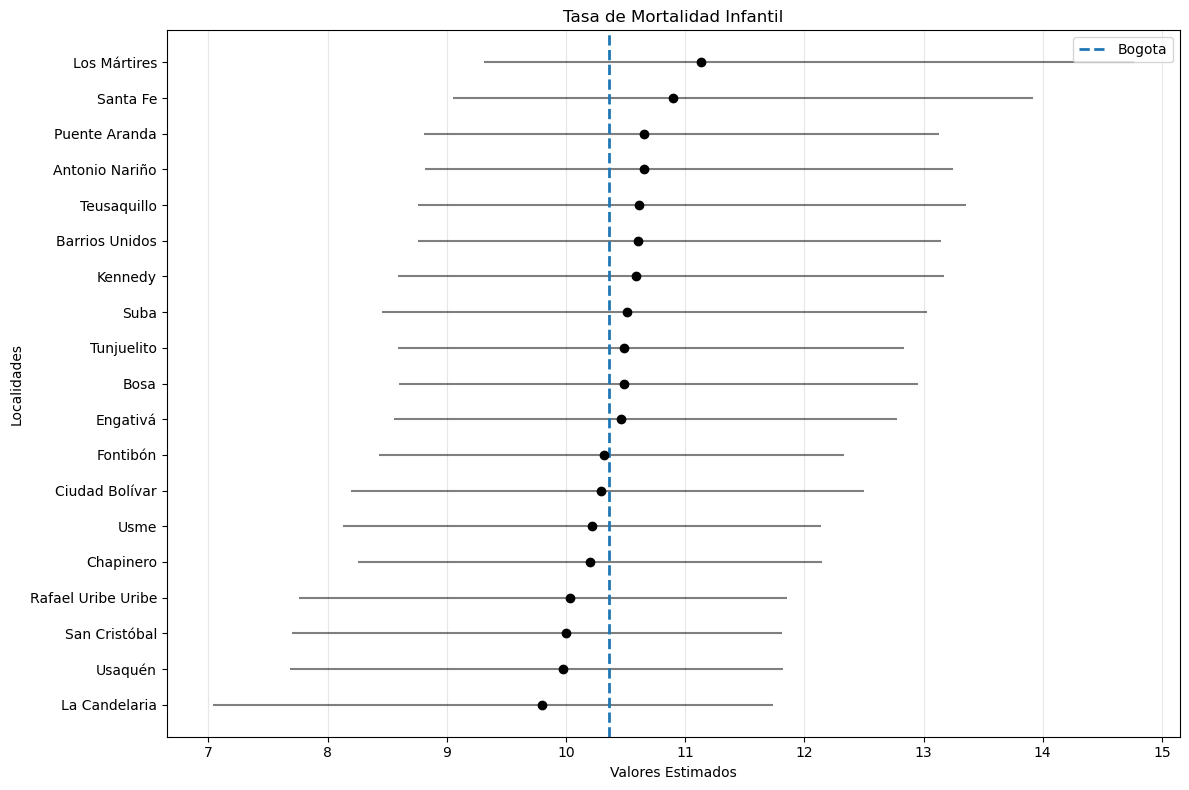

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Tasa de Mortalidad Infantil'}, xlabel='Valores Estimados', ylabel='Localidades'>)

In [16]:
create_hierarchical_forest_plot(trace, param_name="intercept_group",coords=coords)

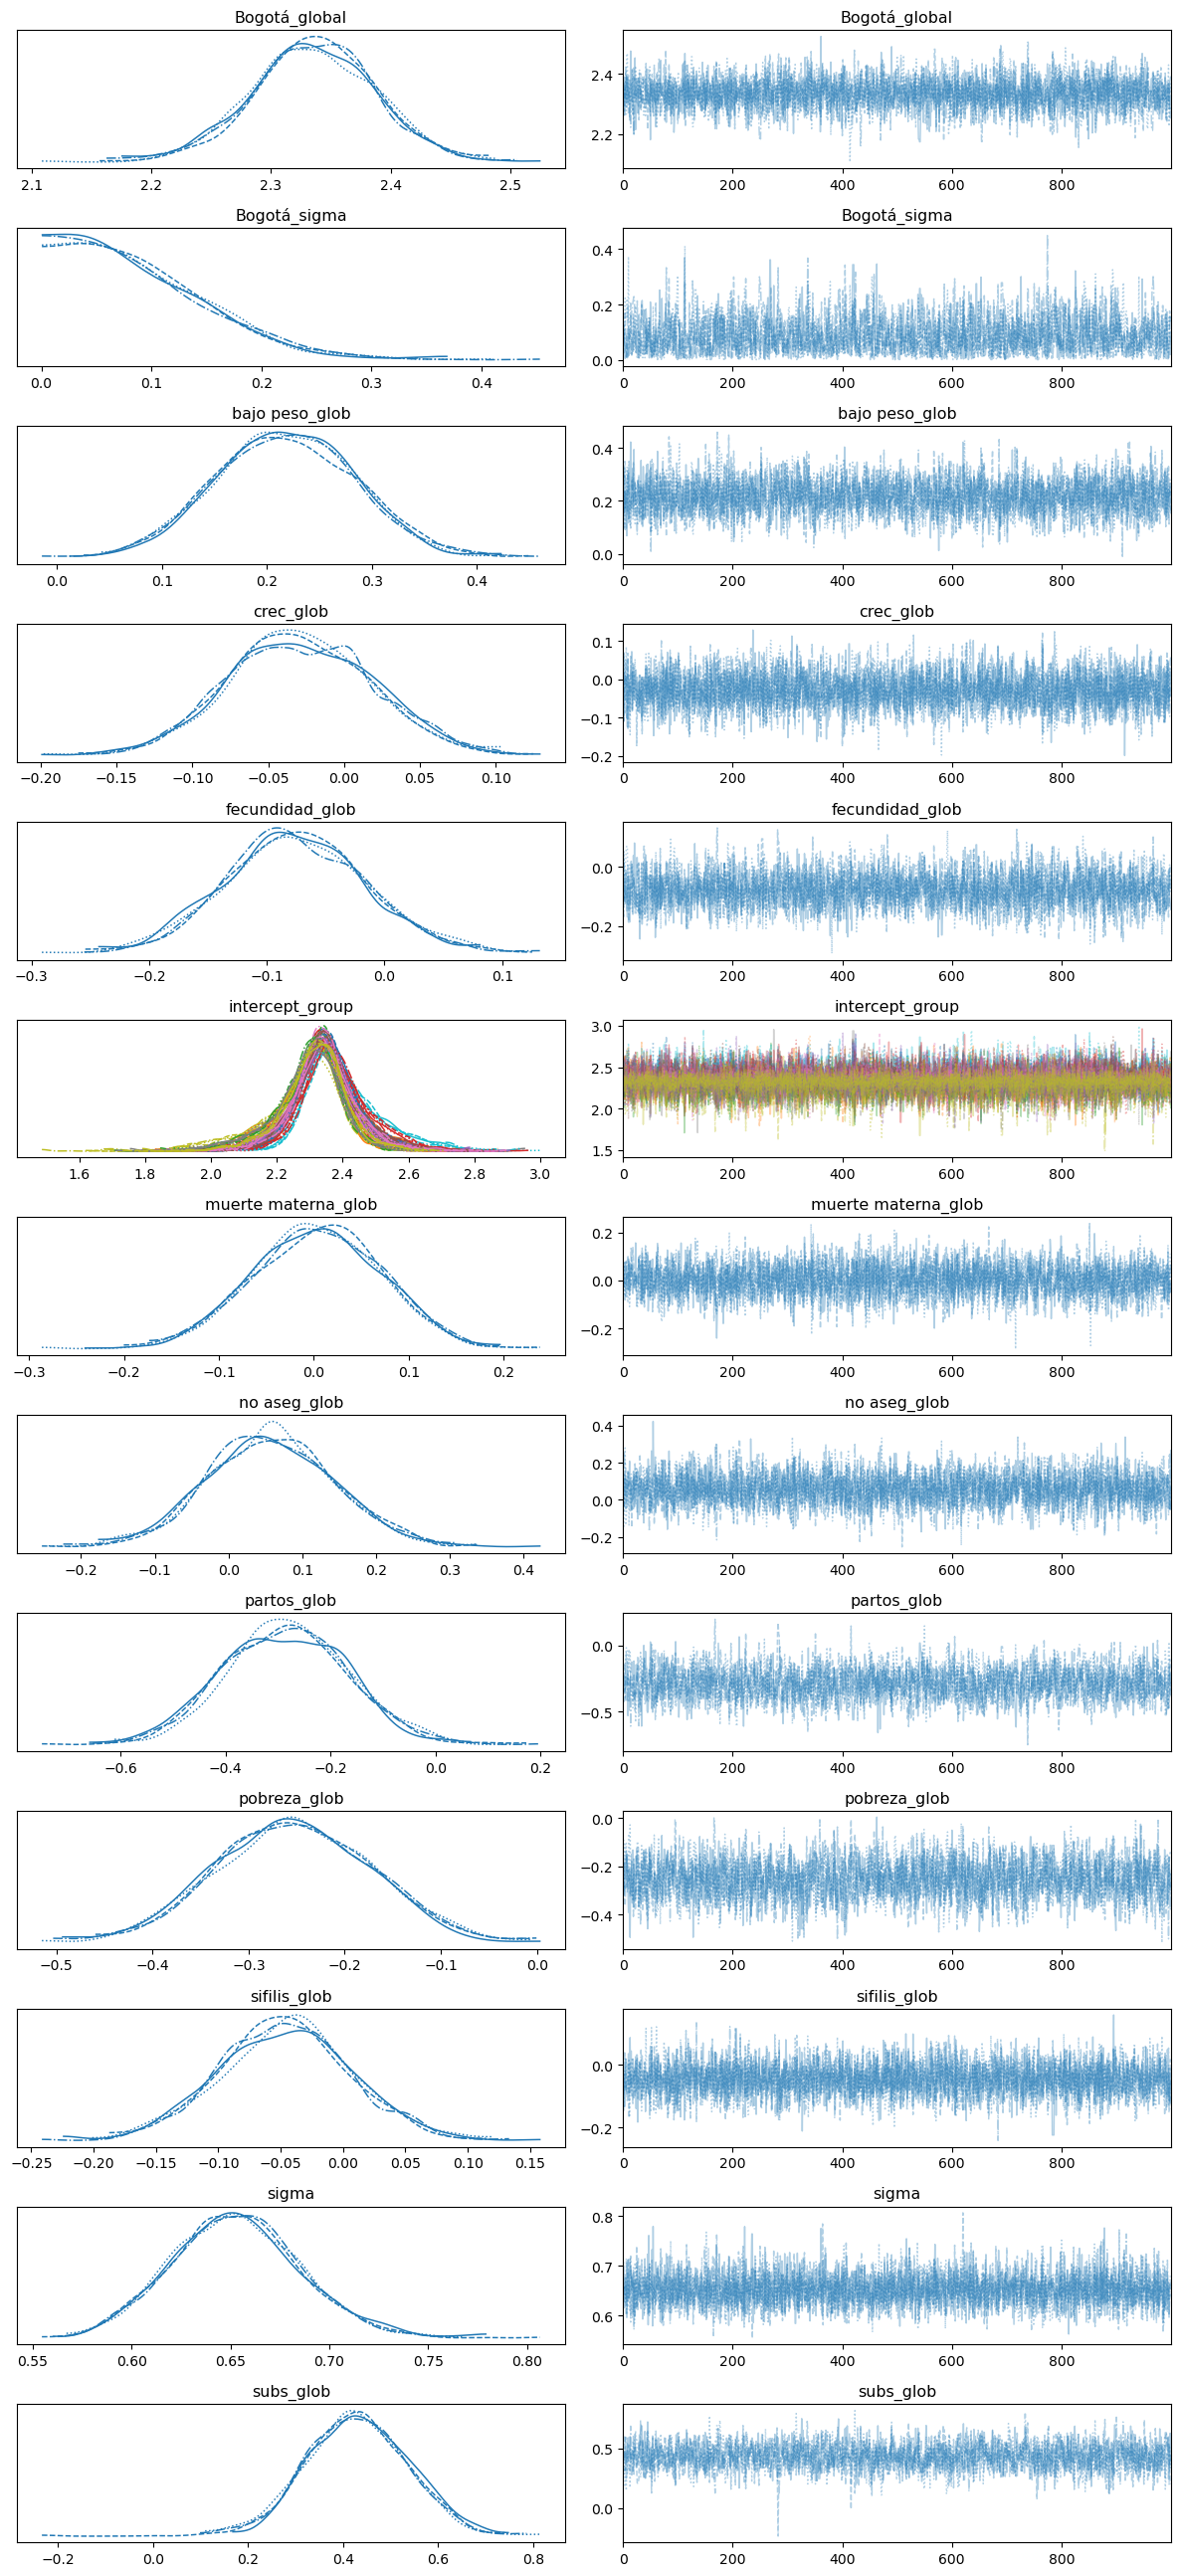

In [34]:
az.plot_trace(trace,variables_post)
plt.tight_layout()
plt.show()

## Distribución Predictiva

In [16]:
with mortalidad_j_r:
    ppc = pm.sample_posterior_predictive(trace)

Sampling: [y_obs]


Output()

In [ ]:
ppc.posterior_predictive

Inference data with groups:
	> posterior_predictive
	> observed_data

In [27]:
y_ppc[0].shape

(1000, 209)

In [28]:
# Extraer valores predictivos
y_ppc = ppc.posterior_predictive['y_obs'][0]


# Promedio de predicciones
y_pred_mean = y_ppc.mean(axis=0)

# Calcular métricas
rmse_ppc = np.sqrt(mean_squared_error(observados, y_pred_mean))
mae_ppc = mean_absolute_error(observados, y_pred_mean)
r2_ppc = r2_score(observados, y_pred_mean)

print(f"RMSE (PPC): {rmse_ppc:.3f}")
print(f"MAE (PPC): {mae_ppc:.3f}")
print(f"R² (PPC): {r2_ppc:.3f}")


RMSE (PPC): 0.630
MAE (PPC): 0.270
R² (PPC): 0.154
